# **Sprint 4** - Tasca 6: Visualització gràfica d'un dataset


## Exercici 1

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# formatem els floats per visualitzar millor la sortida dels metodes descriptius
pd.set_option('display.float_format', lambda x: '%.2f' % x)

flights = pd.read_csv("DelayedFlights.csv")

# primera inspecció de les dades a treballar
pd.set_option('max_columns', None)
flights.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [11]:
flights.info(verbose=True, null_counts=True)
flights.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1936758 non-null  int64  
 1   Year               1936758 non-null  int64  
 2   Month              1936758 non-null  int64  
 3   DayofMonth         1936758 non-null  int64  
 4   DayOfWeek          1936758 non-null  int64  
 5   DepTime            1936758 non-null  float64
 6   CRSDepTime         1936758 non-null  int64  
 7   ArrTime            1929648 non-null  float64
 8   CRSArrTime         1936758 non-null  int64  
 9   UniqueCarrier      1936758 non-null  object 
 10  FlightNum          1936758 non-null  int64  
 11  TailNum            1936753 non-null  object 
 12  ActualElapsedTime  1928371 non-null  float64
 13  CRSElapsedTime     1936560 non-null  float64
 14  AirTime            1928371 non-null  float64
 15  ArrDelay           1928371 non-n

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,1936560.00,1928371.00,1928371.00,1936758.00,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,3341651.15,2008.00,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,133.31,134.30,108.28,42.20,43.19,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.00,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,72.06,71.34,68.64,56.78,53.40,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.00,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.00,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.00,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.00,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


<AxesSubplot:>

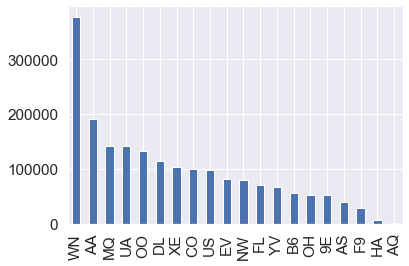

In [35]:
#Una variable categòrica (UniqueCarrier)
flights["UniqueCarrier"].value_counts().plot.bar()

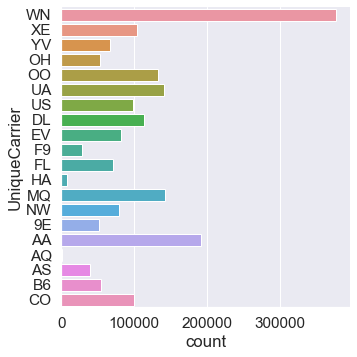

In [13]:
sns.catplot(y="UniqueCarrier", kind="count", data=flights)

<AxesSubplot:xlabel='ArrDelay'>

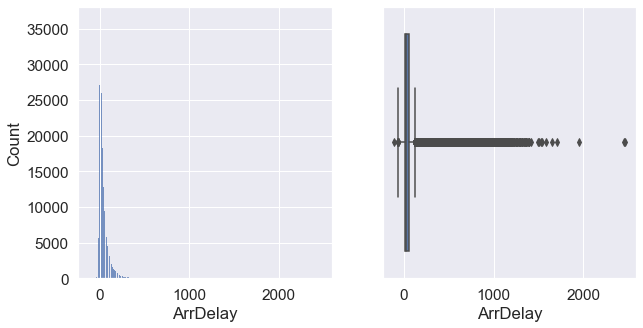

In [36]:
#Una variable numèrica (ArrDelay)
fig, ax =plt.subplots(1,2, figsize=(10,5))
sns.histplot(flights, x="ArrDelay", ax=ax[0])
sns.boxplot(x=flights["ArrDelay"], ax=ax[1])


Text(0.5, 1.0, 'Arrival Delay by Carrier')

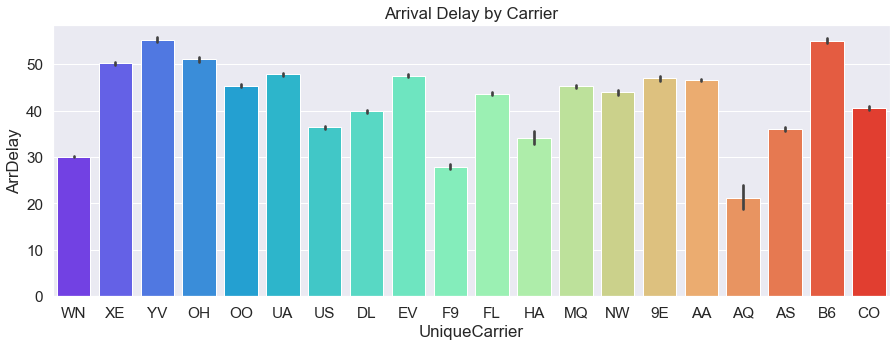

In [40]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
plt.figure(figsize=(15,5))
sns.barplot(x='UniqueCarrier',y='ArrDelay',data=flights, palette='rainbow')
plt.title("Arrival Delay by Carrier")


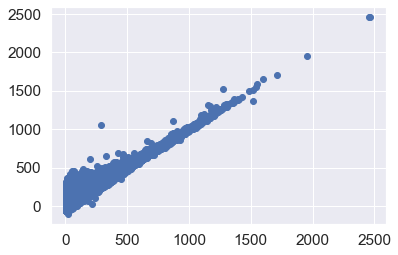

In [41]:
#Dues variables numèriques (ArrDelay i DepDelay)
plt.scatter(flights["DepDelay"], flights["ArrDelay"])

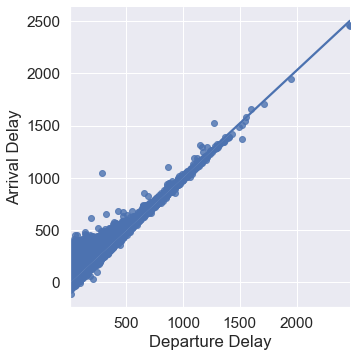

In [43]:
# una altre opció per obtenir la mateixa visualització
g = sns.lmplot(
    data=flights,
    x="DepDelay", y="ArrDelay", 
    height=5
)

g.set_axis_labels("Departure Delay", "Arrival Delay")


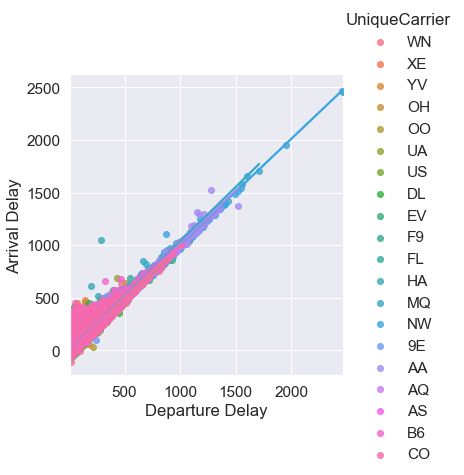

In [44]:
# Tres variables (ArrDelay, DepDelay i UniqueCarrier)
g = sns.lmplot(
    data=flights,
    x="DepDelay", y="ArrDelay", hue="UniqueCarrier", 
    height=5
)

g.set_axis_labels("Departure Delay", "Arrival Delay")

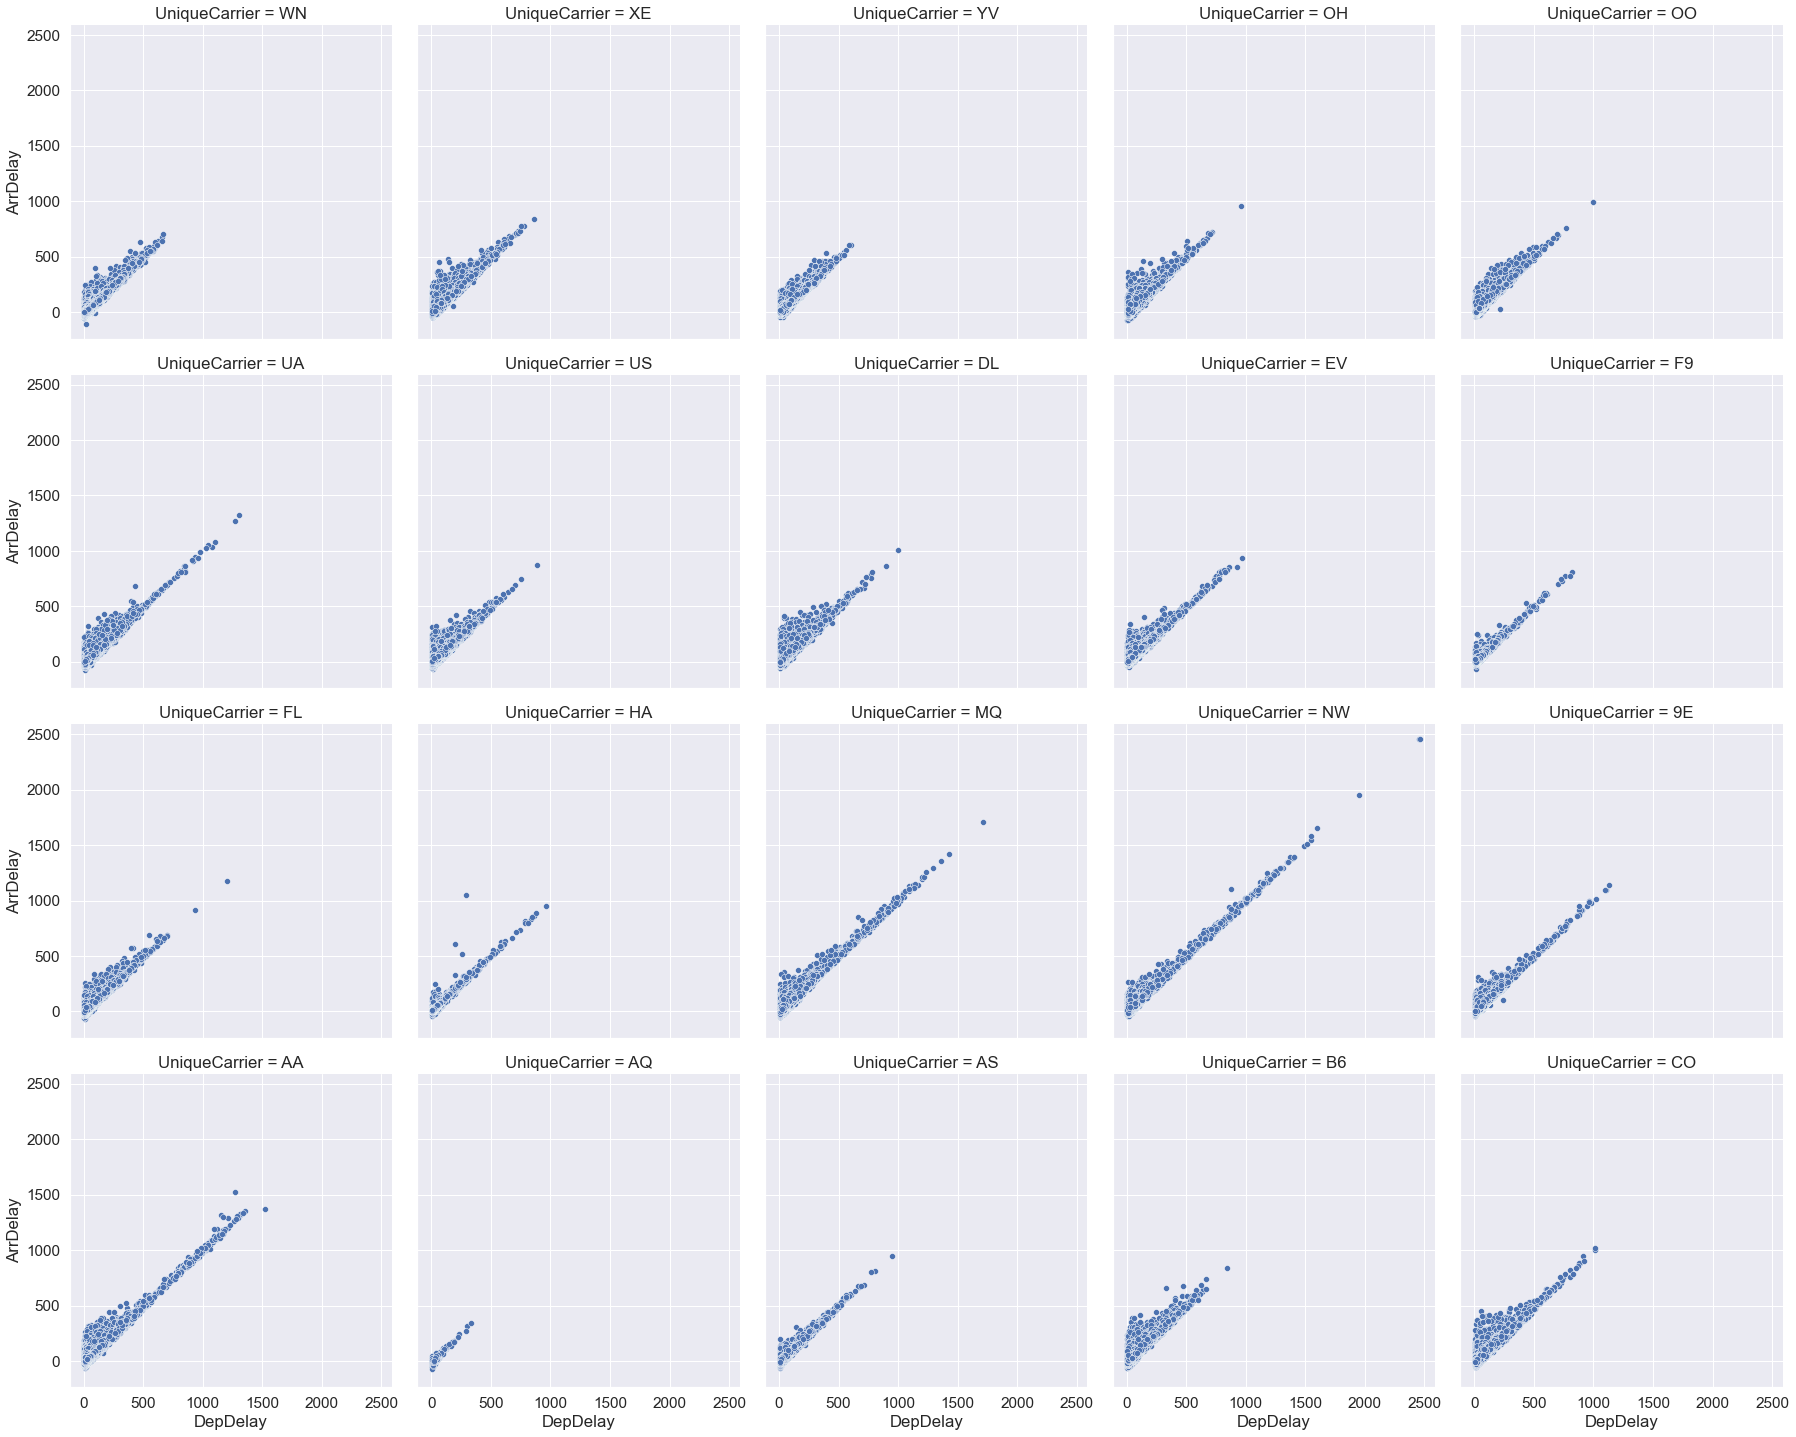

In [54]:
# Tres variables (ArrDelay, DepDelay i UniqueCarrier) - Vosualitzem ara per separat cada Carrier
sns.relplot(x="DepDelay", y="ArrDelay", 
            col="UniqueCarrier", col_wrap=5, data=flights);

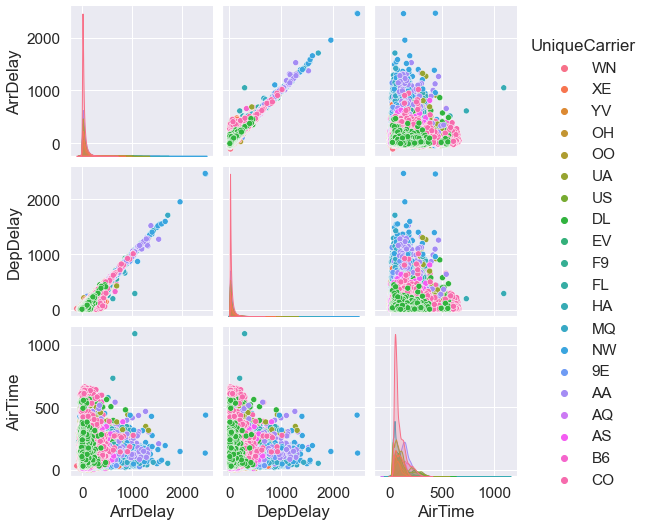

In [67]:
# Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

flights2 = flights[['ArrDelay', 'DepDelay', 'AirTime', 'UniqueCarrier']]
flights2.shape

sns.pairplot(flights2, hue='UniqueCarrier')
plt.savefig('saving-a-seaborn-plot-as-png-file-transparent.png')


## Exercici 2

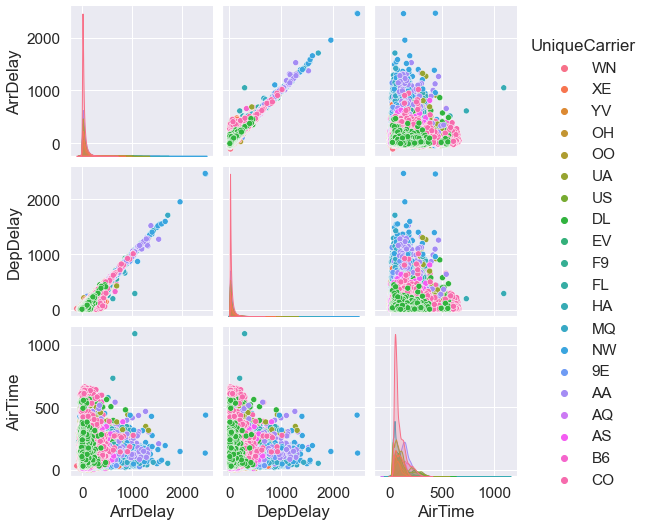

In [68]:
#Exporta els gràfics com imatges o com html.

#exportem com PNG
sns.pairplot(flights2, hue='UniqueCarrier')
plt.savefig('save-as-png.png')

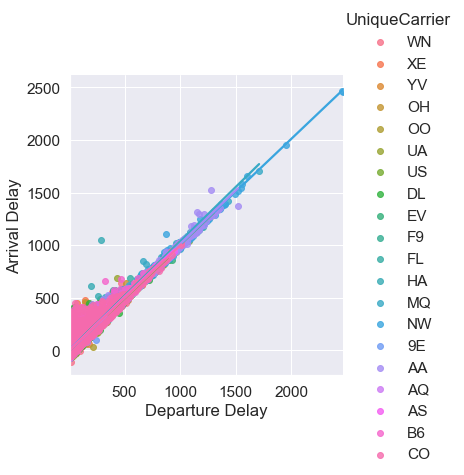

In [70]:
#exportem com PNG Transparent
g = sns.lmplot(
    data=flights,
    x="DepDelay", y="ArrDelay", hue="UniqueCarrier", 
    height=5
)

g.set_axis_labels("Departure Delay", "Arrival Delay")
plt.savefig('save-as-transparent-png.png', transparent=True)

## Exercici 3

In [47]:
#Exporta el data set net i amb les noves columnes a Excel.
#limitem exportació al máxim de files permes per Excel
flights.head(1048576).to_excel("flights_output.xlsx")
#podem exportar la totalitat en format csv
flights.to_csv("flights_output.xlsx")

## Exercici 4

Text(0.5, 1.0, 'Total Arrival Delay by Carrier')

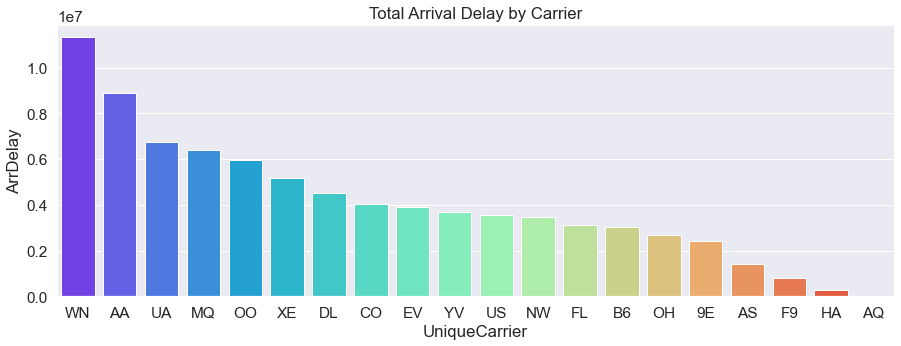

In [82]:
# Afegim visualització gràfica a la taula d'Aerolínies amb més endarreriment de la Tasca 5

# Taula de les aerolínies amb més endarreriments acumulats
flights_delay = flights.groupby('UniqueCarrier')['ArrDelay'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(15,5))
sns.barplot(x='UniqueCarrier',y='ArrDelay',data=flights_delay, palette='rainbow')
plt.title("Total Arrival Delay by Carrier")